<a href="https://colab.research.google.com/github/dltpffldk/quest/blob/main/ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EX.1

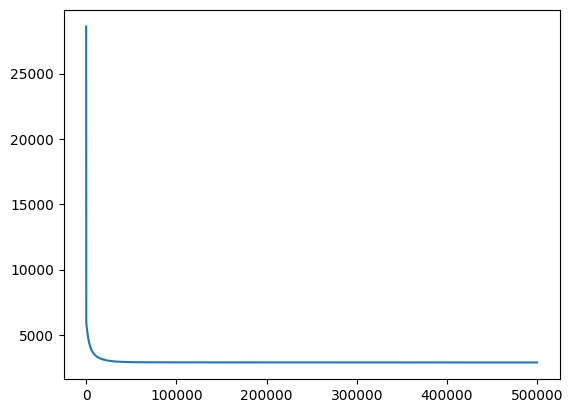

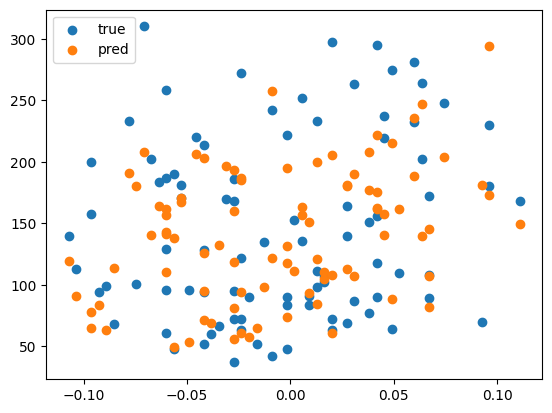

mse:2885.8555247654517


In [3]:
import numpy as np
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

df_x=np.array(diabetes.data)
df_y=np.array(diabetes.target)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

W = np.random.rand(10)
b = np.random.rand()

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

def gradient(X, W, b, y):
  N = len(y)
  y_pred = model(X, W, b)
  dW = 1/N * 2 * X.T.dot(y_pred - y)
  db = 2 * (y_pred - y).mean()
  return dW, db

LEARNING_RATE = 0.01
losses = []

for i in range(1, 500000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label="pred")
plt.legend()
plt.show()
print("mse:{}".format(mse))



EX.2

In [5]:
import pandas as pd
import numpy as np
train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv")
train.head()

train["datetime"] = pd.to_datetime(train["datetime"])
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.head()

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

sns.countplot(data=train, x='year', ax=axes[0, 0])
sns.countplot(data=train, x='month', ax=axes[0, 1])
sns.countplot(data=train, x='day', ax=axes[0, 2])
sns.countplot(data=train, x='hour', ax=axes[1, 0])
sns.countplot(data=train, x='minute', ax=axes[1, 1])
sns.countplot(data=train, x='second', ax=axes[1, 2])

plt.show()

from sklearn.model_selection import train_test_split

y = train["count"]
X = train.drop(["datetime", "casual", "registered", "count"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**0.5)

plt.scatter(X_test["temp"],y_test, label="test",c="b")
plt.scatter(X_test["temp"],y_pred, label="pred",c="r")
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

plt.scatter(X_test["humidity"],y_test, c="b", label="test")
plt.scatter(X_test["humidity"],y_pred, c="r", label="pred")
plt.legend()
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.show()


FileNotFoundError: ignored